In [1]:
# Data preprocessing and manipulation
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

# NLP libraries
import spacy

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import one_hot
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('IMDB_Dataset.csv')

In [86]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [87]:
df.review[:10]

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

<Axes: xlabel='sentiment'>

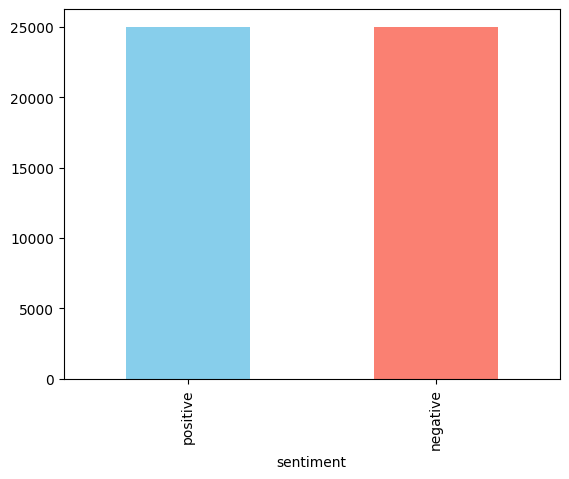

In [88]:
# ploting distribution of data
df.sentiment.value_counts().plot(kind = "bar", color = ["skyblue", "salmon"])


In [3]:
# Define the pattern to be removed
usr_id = r"@[^\s]*"
url = r"(http:\/\/)[^\s]* |(https:\/\/)[^\s]*|(www\.)[^\s]*|(https:\/\/www.)[^\s]*"
punctuationsreg = r"[^a-zA-z0-9 ]"
repeat = r"(.)\1{2,}"
replace_repeat = r"\1\1"
breakword = r"(<br \/>)|(<br\/>)"



# creating preprocessed tweets
def preprocessed_review(review):
    review = str(review).lower()
    
    # Remove URLs
    review = re.sub(url, " ", review)
    # Replace @user with 'USER'
    review = re.sub(usr_id, " ", review)

    # Remove breakwords
    review = re.sub(breakword," ", review)
    
    # Remove punctuations
    review = re.sub(punctuationsreg, " ", review)
    
    # Remove repeating characters
    review = re.sub(repeat, replace_repeat, review)
    
    # Remove extra spaces
    review = re.sub(r"\s+", " ", review).strip()
    
    return review

# sample tweet to test the function
reviews = df.review[4]
print("Original review:", reviews)
print("\n")
print("Preprocessed review:", preprocessed_review(reviews))
sample = preprocessed_review(reviews)

Original review: Petter Mattei's "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns i

In [4]:
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words -= {"no","nevertheless","cannot","yet","no","none","never","not"}

In [5]:
print(nlp.Defaults.stop_words)

{'seemed', 'both', 'first', 'nothing', 'hereupon', 'hers', 'one', 'whatever', 'within', 'nowhere', 'why', 'may', 'afterwards', 'empty', 'mostly', 'now', 'these', 'do', 'at', 'anyhow', 'nobody', 'did', 'still', 'been', 'therefore', 'everywhere', 'enough', 'was', 'towards', 'his', 're', 'about', 'onto', 'has', 'thereby', 'beforehand', '’ve', 'whose', 'me', 'very', 'please', 'nor', "'s", 'regarding', 'fifty', 'but', 'together', 'again', '’m', 'two', 'her', 'other', 'anyway', 'between', "n't", 'upon', 'our', 'thru', 'perhaps', 'yours', 'itself', 'although', 'just', 'can', 'until', 'down', 'whereby', 'became', 'someone', 'say', 'seeming', 'which', 'by', 'whereupon', 'neither', 'five', '’s', 'amongst', '’ll', 'being', 'keep', 'could', 'noone', 'since', 'herein', 'everyone', 'as', 'hereafter', 'so', '‘s', 'while', 'either', 'because', 'across', 'others', 'twenty', 'some', 'have', 'forty', 'thereupon', 'ten', 'moreover', 'most', 'whither', 'she', 'already', 'elsewhere', '‘ve', 'back', 'around'

In [6]:
def stop_lemma(review):
    doc = nlp(review)
    filtered_words = [ ]
    for tokens in doc:
        if(tokens.is_stop):
            continue
        filtered_words.append(str(tokens.lemma_))
    filtered_sentence = " ".join(filtered_words).strip()
    return filtered_sentence

print("Original review:", sample)
print("\n")
print("Original review:", stop_lemma(sample))

Original review: petter mattei s love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzler s play about the same theme the director transfers the action to the present time new york where all these different characters meet and connect each one is connected in one way or another to the next person but no one seems to know the previous point of contact stylishly the film has a sophisticated luxurious look we are taken to see how these people live and the world they live in their own habitat the only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits a big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we en

In [ ]:
df['review'] = df['review'].apply(preprocessed_review)
df['review'] = df['review'].apply(stop_lemma)

In [67]:
df.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode ll h...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically s family little boy jake thinks s zo...,negative
4,petter mattei s love time money visually stunn...,positive


In [68]:
df.to_csv("Prepro_stoplemma.csv")

In [115]:
le =  LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

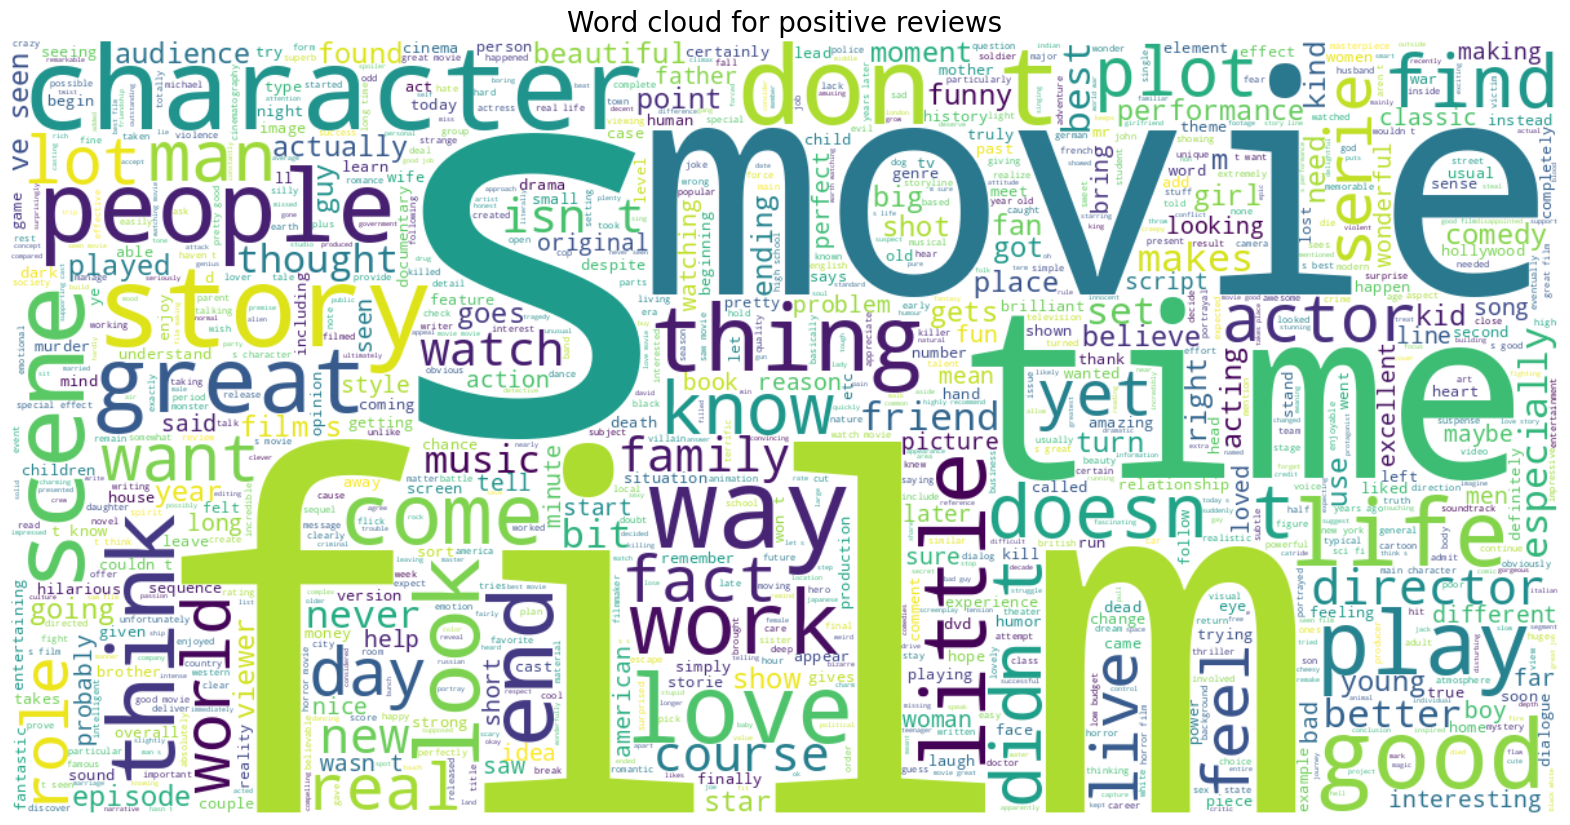

In [123]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

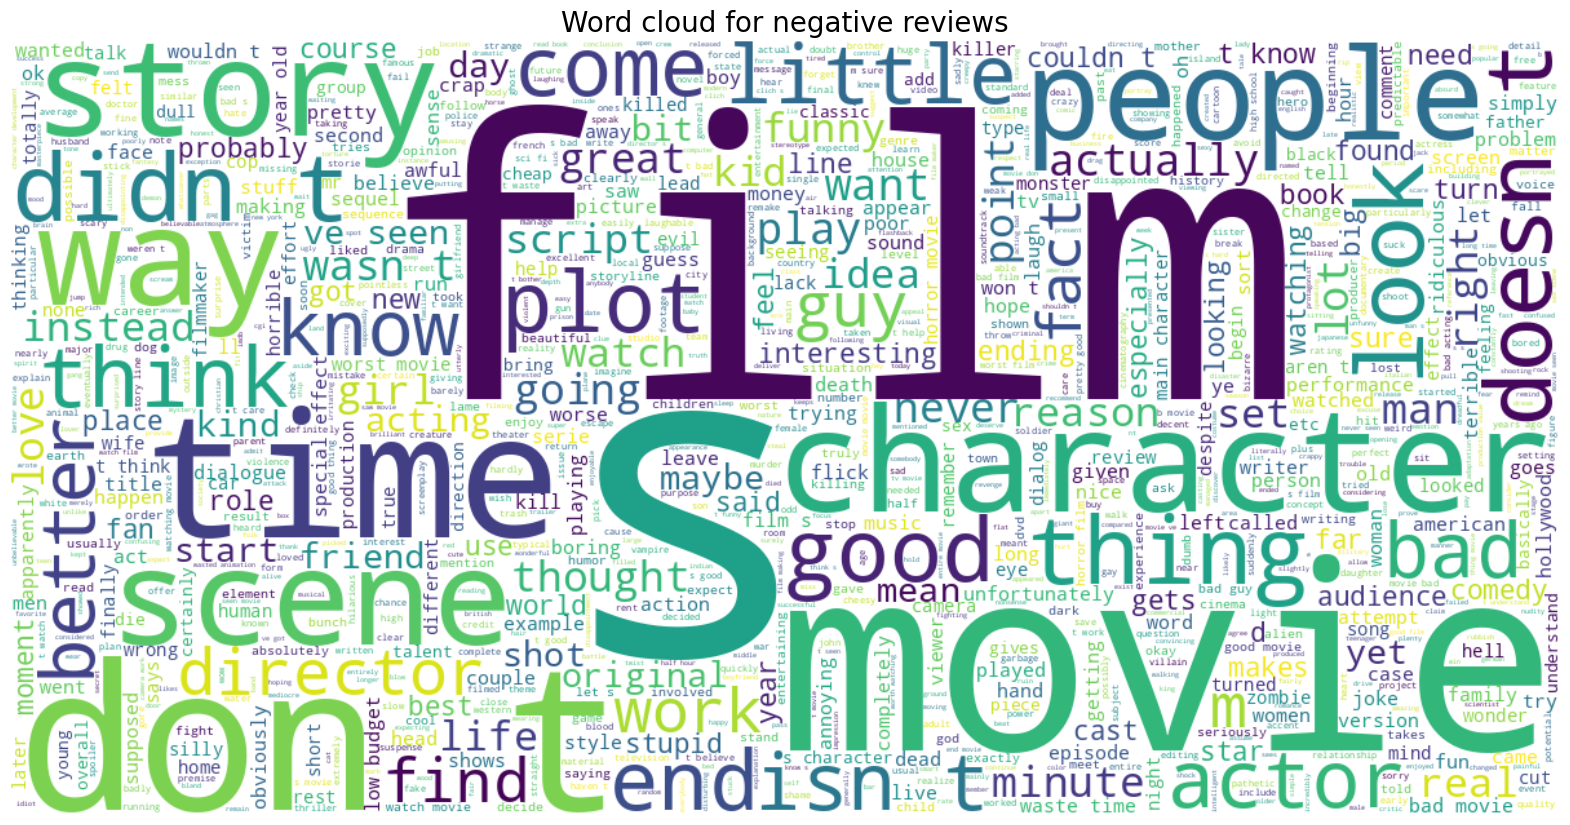

In [124]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

In [12]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [60]:
print(X[0])

reviewers mentioned watching 1 oz episode ll hooked right exactly happened thing struck oz brutality unflinching scenes violence set right word trust not faint hearted timid pulls no punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy not high agenda em city home aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away main appeal fact goes shows wouldn t dare forget pretty pictures painted mainstream audiences forget charm forget romance oz doesn t mess episode saw struck nasty surreal couldn t ready watched developed taste oz got accustomed high levels graphic violence not violence injustice crooked guards ll sold nickel inmates ll kill order away mannered middle class inmates turned prison bitches lack street skills prison experience watching oz

In [3]:
# Vocab size
vocab_size = 50000

In [16]:
X = np.array(X).flatten()

In [17]:
# One hot representation 
one_hot_rep = [one_hot(word,vocab_size,) for word in X]

In [61]:
one_hot_rep[0]

[45865,
 14259,
 32428,
 23283,
 29378,
 49444,
 28707,
 19551,
 2973,
 38693,
 32813,
 4165,
 45370,
 29378,
 23137,
 38531,
 6519,
 10732,
 164,
 2973,
 37511,
 30300,
 5675,
 38531,
 37859,
 33511,
 29318,
 42478,
 21284,
 9971,
 7563,
 29590,
 10732,
 779,
 1358,
 33349,
 37511,
 49969,
 29378,
 47961,
 42983,
 25932,
 34372,
 29908,
 43382,
 26445,
 35339,
 18519,
 18078,
 4199,
 28789,
 32345,
 4884,
 11133,
 17815,
 29343,
 27436,
 48439,
 12345,
 5675,
 38462,
 49232,
 3405,
 4199,
 47894,
 33370,
 48322,
 7934,
 11520,
 16550,
 139,
 19103,
 22296,
 30998,
 4039,
 49083,
 8132,
 36330,
 12183,
 40785,
 7010,
 43522,
 38326,
 39302,
 6193,
 12567,
 42341,
 24460,
 19908,
 6443,
 36017,
 28984,
 26190,
 15901,
 1396,
 24343,
 36017,
 30160,
 36017,
 46151,
 29378,
 21837,
 19908,
 34814,
 49444,
 44272,
 45370,
 46487,
 6516,
 1754,
 19908,
 20349,
 18402,
 46550,
 27633,
 29378,
 14456,
 15740,
 38462,
 5522,
 3458,
 10732,
 5675,
 10732,
 7222,
 40968,
 26927,
 28707,
 29795,


In [18]:
one_hot_rep[1]

[24655,
 17235,
 35538,
 8086,
 15981,
 37532,
 13984,
 20545,
 8470,
 5694,
 40219,
 42039,
 6864,
 21889,
 47890,
 35342,
 9449,
 32324,
 31852,
 40760,
 29876,
 3947,
 5675,
 14456,
 14779,
 29424,
 21094,
 31364,
 46345,
 29714,
 43434,
 30822,
 10748,
 29922,
 20421,
 5675,
 22094,
 32428,
 26345,
 5203,
 49108,
 9449,
 45981,
 35538,
 3534,
 19580,
 46660,
 1209,
 38164,
 47890,
 8365,
 47894,
 17235,
 32647,
 31611,
 20198,
 33349,
 37925,
 45335,
 34437,
 2588,
 24922,
 16278,
 21362,
 29880,
 15865,
 3859,
 6519,
 23138,
 30196,
 16920,
 47932,
 3859,
 671,
 16920,
 46660,
 16029,
 14604,
 39037,
 665]

In [20]:
from collections import Counter

subarray_lengths = [len(subarray) for subarray in X]
mode_length = Counter(subarray_lengths).most_common(1)[0][0]

print("Mode length:", mode_length)


Mode length: 402


In [24]:
# add padding 
sent_len = 500
embedded_doc = pad_sequences(one_hot_rep,padding='pre',maxlen = sent_len)

In [25]:
embedded_doc[42335]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [4]:
embedded_feature_size = 300
model = Sequential()
model.add(Embedding(vocab_size,embedded_feature_size))
model.add(Dropout(0.6))
model.add(LSTM(128, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(1, activation = 'sigmoid', kernel_regularizer=l2(0.01)))

In [94]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         15000000  
                                                                 
 dropout (Dropout)           (None, None, 300)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                      

In [96]:
len(embedded_doc), y.shape

(50000, (50000,))

In [97]:
X_emb = np.array(embedded_doc)
y_emb = np.array(y)

In [98]:
(X_emb.shape),(y_emb.shape)

((50000, 500), (50000,))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_emb,y_emb,test_size=0.2)

In [100]:
# Training the model

summary = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=20, batch_size = 64, callbacks=[early_stopping] )


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.7525 - loss: 1.3768 - val_accuracy: 0.8715 - val_loss: 0.3482
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.9179 - loss: 0.2422 - val_accuracy: 0.8080 - val_loss: 0.4760
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9496 - loss: 0.1690 - val_accuracy: 0.8865 - val_loss: 0.3239
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9633 - loss: 0.1336 - val_accuracy: 0.8789 - val_loss: 0.4160
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9716 - loss: 0.1120 - val_accuracy: 0.8722 - val_loss: 0.4378
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9779 - loss: 0.0978 - val_accuracy: 0.8687 - val_loss: 0.4799
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9807 - loss: 0.0871 - val_accuracy: 0.8758 - val_loss: 0.4762
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9866 - loss: 0.0712 - 

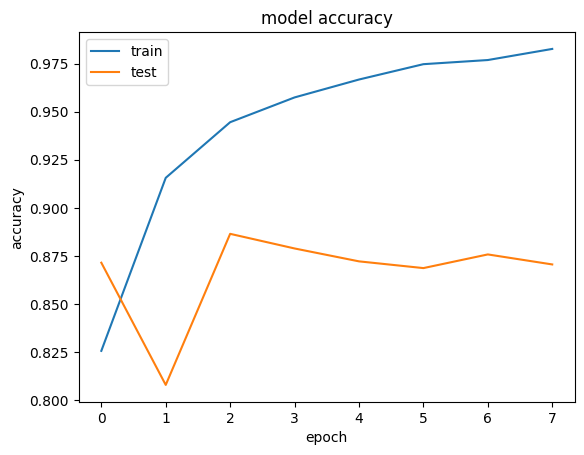

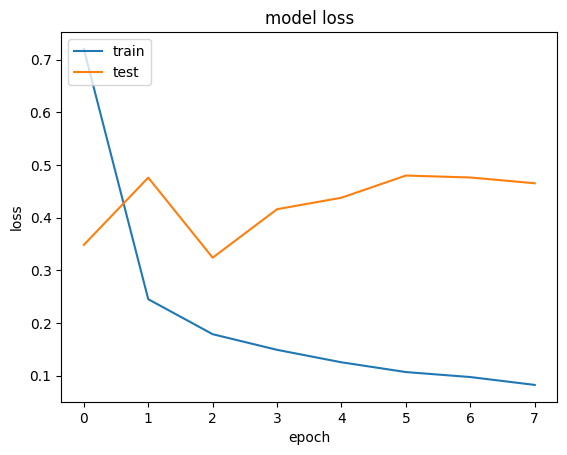

In [113]:
plt.plot(summary.history['accuracy'])
plt.plot(summary.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [101]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [102]:
y_pred=np.where(y_pred > 0.5, 1,0)

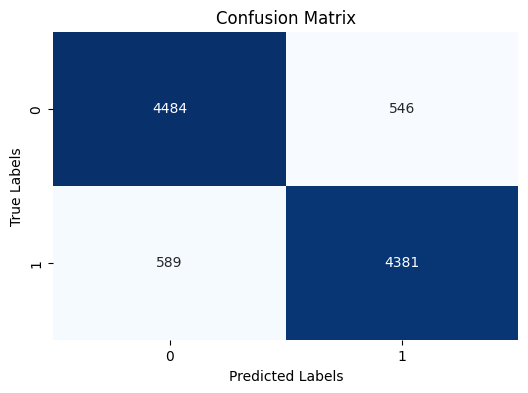

In [103]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [104]:
accuracy_score(y_test,y_pred)

0.8865

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      5030
           1       0.89      0.88      0.89      4970

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [106]:
# Save the model
model.save("movie_sentiment.h5")


In [107]:
# take input from user
def preprocess_input(text):
    text = preprocessed_review(text)
    text = stop_lemma(text)
    text = [one_hot(text, vocab_size)]
    text = pad_sequences(text, padding='pre', maxlen = sent_len)
    return text

def predict_sentiment(text):
    text = preprocess_input(text)
    prediction = model.predict(text)
    return "Positive" if prediction > 0.5 else "Negative"


In [108]:
# New user iput from the latest movie Dune 2 (2024)

user_input = """
This is the kind of movie that is impossible to do justice, just by talking about it! It is the kind of experience you had once.. but you never thought you would get again.. until this movie proves you WRONG!!

This movie takes the aspects of the first movie and improves upon them in almost every way possible, already writing itself into the books of greatest sequels of ALL TIME!!

Everything in this movie was TOP notch! Dennis Villeneauve proves why he is not only a master of Sci-Fi movies, but just filmmaking in general! This was a demonstration of power, in what you can achieve with filmmaking!

I beg you to watch this on the biggest and best screen you can find! This will be an experience that will stick with you forever!

I thought the real Blockbuster was dead.. but I was wrong! This is the cinematic experience i craved!

Now I am gonna watch this movie again, and maybe again! Then I am gonna read the books!
"""
print(predict_sentiment(user_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Positive


In [110]:
# New user iput from the latest movie Jaws 2 (2023)

user_input = """
I wanted to like this, I really did, it has everything, giant creature, Statham, shark, but this is just so boring.

The problem is, it hits every cliché. Annoying kid, paint by the number villain, a predictable plot. Unlikable characters who all behave like cartoon characters.

I liked the first movie and was looking forward to the sequel, but the irritating characters and lazy [;it just didn't do it for me.

I don't mind popcorn movies where you park your brain at the door, but they are usually fun. I think that is the problem here, it just was not fun. Statham is the best thing about this movie, he always turns in a reliable performance. The rest of the cast are so forgettable, in the end I was cheering for the shark.

If I want a good shark movie, I will watch Jaws.
"""
print(predict_sentiment(user_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Negative
